In [ ]:
!pip install openslide-python


     |████████████████████████████████| 316 kB 12.8 MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.1.2-cp37-cp37m-linux_x86_64.whl size=27705 sha256=d68f87c7a25e29c0d5a649c84c4f43737fd34899dd174c16c57b3887945d11c0
  Stored in directory: /root/.cache/pip/wheels/6f/c3/97/980962653f9305314bfb6d93f80be5e21f13e206af66fc7ad3
Successfully built openslide-python


In [ ]:
!sudo apt-get install openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
!sudo apt-get install python-openslide

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

#**Run Packages**

In [ ]:
import os #operating system dependent functionality.
import re #regular expression
import sys #System
import cv2 #OpenCv
import PIL #Pillow
import glob #Global variable
import math 
import datetime
import openslide #For reading WSIs
import numpy as np # Numpy
import pandas as pd #Pandas
from PIL import Image 
import multiprocessing
import matplotlib.pyplot as plt
from openslide import OpenSlideError
from PIL import Image, ImageDraw, ImageFont

#**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Pathology_Workshop/WSI_2_Patches/Pathology_data_raw_file"
total_files = os.listdir(data_path)
total_files

['test-001.svs',
 'TUPAC-TE-226.svs',
 'TCGA-49-4512.svs',
 'TCGA-49-4514.svs',
 'TCGA-78-8640.svs']

In [ ]:
# Arguments and variable values
SCALE_FACTOR = 32
patch_size=256 # 512, 70 

In [ ]:
def filter_rgb_to_grayscale(np_img, output_type="uint8"):
  grayscale = np.dot(np_img[..., :3], [0.2125, 0.7154, 0.0721])
  if output_type != "float":
    grayscale = grayscale.astype("uint8")
  return grayscale


In [ ]:
# creating tiles directory
if not os.path.isdir("/content/drive/MyDrive/Pathology_Workshop/WSI_2_Patches/tiles"):
  os.mkdir("/content/drive/MyDrive/Pathology_Workshop/WSI_2_Patches/tiles")

test-001.svs
46000 32914 1437 1028 2 <PIL.Image.Image image mode=RGB size=2875x2057 at 0x7FAC0156AE10> <PIL.Image.Image image mode=RGB size=1437x1028 at 0x7FAC16CA8410>


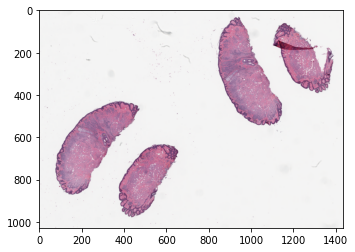

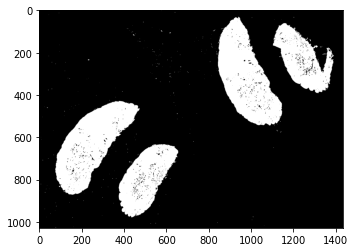

273193
1477236
Total tissue is 18.0%
Total Non-tissue is 82.0%
179 128
TUPAC-TE-226.svs
63310 26793 1978 837 2 <PIL.Image.Image image mode=RGB size=3956x1674 at 0x7FAC16DF4550> <PIL.Image.Image image mode=RGB size=1978x837 at 0x7FABFEFFC610>


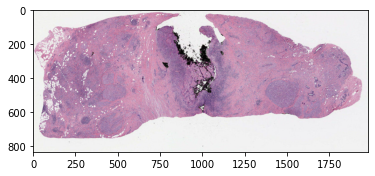

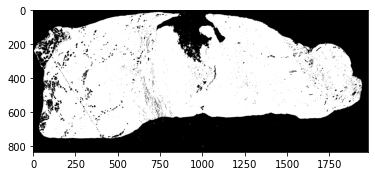

962200
1655586
Total tissue is 58.0%
Total Non-tissue is 42.0%
247 104


KeyboardInterrupt: ignored

In [ ]:
for file in total_files:
    if file.endswith ('.svs'):
        print(file)
        slide = openslide.open_slide(data_path+'/'+file) # "openslide.open_slide" is a function for reading .svs files
        large_w, large_h = slide.dimensions
        new_w = math.floor(large_w / SCALE_FACTOR)
        new_h = math.floor(large_h / SCALE_FACTOR)
        level = slide.get_best_level_for_downsample(SCALE_FACTOR) # WSIs are pyramidal structure so level is magnification level
        whole_slide_image = slide.read_region((0, 0), level, slide.level_dimensions[level])
        whole_slide_image = whole_slide_image.convert("RGB")
        img = whole_slide_image.resize((new_w, new_h), PIL.Image.BILINEAR)
        print(large_w, large_h, new_w, new_h, level, whole_slide_image, img)
        plt.imshow(img)
        plt.show()  
        file_name = 'X_'+ str(new_w) + '_Y_'+ str(new_h) + '.png' #JPEG, TIF
        # Save file into .pngs (X= 1437, Y= 1028)
        img.save(file_name)
        np_img = np.asanyarray(img)
        r2bgray = filter_rgb_to_grayscale(np_img, output_type="uint8")
        (thresh, im_bw) = cv2.threshold(r2bgray, 0,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        convert_bin = np.invert(im_bw)
        plt.imshow(convert_bin, cmap='gray')
        plt.show()
        df = pd.DataFrame(convert_bin)
        
        total_pixels = df.size
        non_zeropixels = np.count_nonzero(df)
        print(non_zeropixels)
        print(total_pixels)

        Total_tissue_percentage = np.round((non_zeropixels/total_pixels)*100)

        Total_non_tissue_pixels =(total_pixels - non_zeropixels)
        
        Total_non_tissue_percentage =  np.round((Total_non_tissue_pixels/total_pixels)*100)

        print(f'Total tissue is {Total_tissue_percentage}%')
        print(f'Total Non-tissue is {Total_non_tissue_percentage}%')
        # defining patch size 
        
        # getting dimensions of WSI and upper bounds for n_across and n_down
        n_across=large_w//patch_size
        n_down=large_h//patch_size
        print(n_across, n_down)

        # initializing parameters
        n_patches=0
        j=1
        flag=0
        i=1
        # iterating over WSI and extracting 256 X 256 tiles
        for y in range(n_down):
            for x in range(n_across):  
              # getting tile using read_region() function
              patch=slide.read_region((x*patch_size,y*patch_size),0,(patch_size,patch_size))

              # converting to RGB
              patch = patch.convert("RGB")

              # defining target directory to store tiles
              target_dir="wsi_%d"%(i)+"_tile_%d.png"%(j)

              # output path
              out_path=os.path.join("/content/drive/MyDrive/Pathology_Workshop/WSI_2_Patches/tiles",target_dir)
              j+=1
              # Saving patch in output path
              patch.save(out_path)
        i+=1
        
    